In [1]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')

2024-01-16 15:19:28.726582: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-16 15:19:28.825946: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-16 15:19:28.825989: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-16 15:19:28.829790: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-16 15:19:28.829831: I external/local_xla/xla/stream_executor

21834768/21834768 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [2]:
model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │       0 │ -                    │
│ (InputLayer)        │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ rescaling           │ (None, 224, 224,  │       0 │ input_layer[0][0]    │
│ (Rescaling)         │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ normalization       │ (None, 224, 224,  │       7 │ rescaling[0][0]      │
│ (Normalization)     │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ rescaling_1         │ (None, 224, 224,  │       0 │ normalization[0][0]  │
│ (Rescaling)         │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │       0 │ rescaling_1[0][0]    │
│ (ZeroPadding2D)     │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │     864 │ stem_conv_pad[0][0]  │
│                     │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ stem_bn             │ (None, 112, 112,  │     128 │ stem_conv[0][0]      │
│ (BatchNormalizatio… │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ stem_activation     │ (None, 112, 112,  │       0 │ stem_bn[0][0]        │
│ (Activation)        │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │     288 │ stem_activation[0][… │
│ (DepthwiseConv2D)   │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_bn          │ (None, 112, 112,  │     128 │ block1a_dwconv[0][0] │
│ (BatchNormalizatio… │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_activation  │ (None, 112, 112,  │       0 │ block1a_bn[0][0]     │
│ (Activation)        │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │       0 │ block1a_activation[… │
│ (GlobalAveragePool… │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │       0 │ block1a_se_squeeze[… │
│ (Reshape)           │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │     264 │ block1a_se_reshape[… │
│ (Conv2D)            │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │     288 │ block1a_se_reduce[0… │
│ (Conv2D)            │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │       0 │ block1a_activation[… │
│ (Multiply)          │ 32)               │         │ block1a_se_expand[0… │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │     512 │ block1a_se_excite[0

 Total params: 5,330,571 (20.33 MB)

 Trainable params: 5,288,548 (20.17 MB)

 Non-trainable params: 42,023 (164.16 KB)

(1, 224, 224, 3)


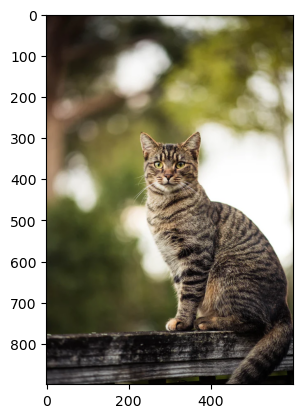

In [23]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'cat1.png'

img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))

x = np.expand_dims(img,axis=0)
x = preprocess_input(x)
print(x.shape)

my_img = cv2.imread(img_path)
my_img = cv2.cvtColor(my_img,cv2.COLOR_BGR2RGB)
imshow(my_img)

In [24]:
pred = model.predict(x)
decode_predictions(pred,top=3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[[('n02123159', 'tiger_cat', 0.51389146),
  ('n02123045', 'tabby', 0.22698282),
  ('n02124075', 'Egyptian_cat', 0.15973336)]]

In [7]:
from tensorflow.keras.applications import EfficientNetB1
model1 = EfficientNetB1(weights='imagenet')

32148312/32148312 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [9]:
model1.summary()

Model: "efficientnetb1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 240, 240,  │       0 │ -                    │
│ (InputLayer)        │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ rescaling_2         │ (None, 240, 240,  │       0 │ input_layer_1[0][0]  │
│ (Rescaling)         │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ normalization_1     │ (None, 240, 240,  │       7 │ rescaling_2[0][0]    │
│ (Normalization)     │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ rescaling_3         │ (None, 240, 240,  │       0 │ normalization_1[0][… │
│ (Rescaling)         │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ stem_conv_pad       │ (None, 241, 241,  │       0 │ rescaling_3[0][0]    │
│ (ZeroPadding2D)     │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ stem_conv (Conv2D)  │ (None, 120, 120,  │     864 │ stem_conv_pad[0][0]  │
│                     │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ stem_bn             │ (None, 120, 120,  │     128 │ stem_conv[0][0]      │
│ (BatchNormalizatio… │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ stem_activation     │ (None, 120, 120,  │       0 │ stem_bn[0][0]        │
│ (Activation)        │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_dwconv      │ (None, 120, 120,  │     288 │ stem_activation[0][… │
│ (DepthwiseConv2D)   │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_bn          │ (None, 120, 120,  │     128 │ block1a_dwconv[0][0] │
│ (BatchNormalizatio… │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_activation  │ (None, 120, 120,  │       0 │ block1a_bn[0][0]     │
│ (Activation)        │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │       0 │ block1a_activation[… │
│ (GlobalAveragePool… │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │       0 │ block1a_se_squeeze[… │
│ (Reshape)           │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │     264 │ block1a_se_reshape[… │
│ (Conv2D)            │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │     288 │ block1a_se_reduce[0… │
│ (Conv2D)            │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_se_excite   │ (None, 120, 120,  │       0 │ block1a_activation[… │
│ (Multiply)          │ 32)               │         │ block1a_se_expand[0… │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_project_co… │ (None, 120, 120,  │     512 │ block1a_se_excite[0

 Total params: 7,856,239 (29.97 MB)

 Trainable params: 7,794,184 (29.73 MB)

 Non-trainable params: 62,055 (242.41 KB)

In [25]:
img = cv2.imread(img_path)
img = cv2.resize(img,(240,240))
x1 = np.expand_dims(img,axis=0)
x1 = preprocess_input(x1)
print(x1.shape)

(1, 240, 240, 3)


In [26]:
pred1 = model1.predict(x1)
decode_predictions(pred1,top=3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[[('n02123159', 'tiger_cat', 0.63305974),
  ('n02124075', 'Egyptian_cat', 0.13682361),
  ('n02123045', 'tabby', 0.1210706)]]

In [17]:
from tensorflow.keras.applications import EfficientNetB7
model3 = EfficientNetB7(weights='imagenet')

268326632/268326632 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


In [18]:
model3.summary()

Model: "efficientnetb7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 600, 600,  │       0 │ -                    │
│ (InputLayer)        │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ rescaling_4         │ (None, 600, 600,  │       0 │ input_layer_2[0][0]  │
│ (Rescaling)         │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ normalization_2     │ (None, 600, 600,  │       7 │ rescaling_4[0][0]    │
│ (Normalization)     │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ rescaling_5         │ (None, 600, 600,  │       0 │ normalization_2[0][… │
│ (Rescaling)         │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ stem_conv_pad       │ (None, 601, 601,  │       0 │ rescaling_5[0][0]    │
│ (ZeroPadding2D)     │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ stem_conv (Conv2D)  │ (None, 300, 300,  │   1,728 │ stem_conv_pad[0][0]  │
│                     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ stem_bn             │ (None, 300, 300,  │     256 │ stem_conv[0][0]      │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ stem_activation     │ (None, 300, 300,  │       0 │ stem_bn[0][0]        │
│ (Activation)        │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_dwconv      │ (None, 300, 300,  │     576 │ stem_activation[0][… │
│ (DepthwiseConv2D)   │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_bn          │ (None, 300, 300,  │     256 │ block1a_dwconv[0][0] │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_activation  │ (None, 300, 300,  │       0 │ block1a_bn[0][0]     │
│ (Activation)        │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_se_squeeze  │ (None, 64)        │       0 │ block1a_activation[… │
│ (GlobalAveragePool… │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 64)  │       0 │ block1a_se_squeeze[… │
│ (Reshape)           │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 16)  │   1,040 │ block1a_se_reshape[… │
│ (Conv2D)            │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 64)  │   1,088 │ block1a_se_reduce[0… │
│ (Conv2D)            │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_se_excite   │ (None, 300, 300,  │       0 │ block1a_activation[… │
│ (Multiply)          │ 64)               │         │ block1a_se_expand[0… │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1a_project_co… │ (None, 300, 300,  │   2,048 │ block1a_se_excite[0

 Total params: 66,658,687 (254.28 MB)

 Trainable params: 66,347,960 (253.10 MB)

 Non-trainable params: 310,727 (1.19 MB)

In [27]:
img=cv2.imread(img_path)
img = cv2.resize(img,(600,600))
x = np.expand_dims(img,axis=0)
x = preprocess_input(x)
print(x.shape)

(1, 600, 600, 3)


In [28]:
pred = model3.predict(x)
decode_predictions(pred,top=3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


[[('n02123159', 'tiger_cat', 0.63216585),
  ('n02123045', 'tabby', 0.14086916),
  ('n02124075', 'Egyptian_cat', 0.04445086)]]